In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm

In [4]:
data = pd.read_excel(r"C:\Users\Muthumanimaran\Downloads\TCS\TCSQC\FTSE100\Forecasting.xlsx",  sheet_name='^FTSE')
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-01,5394.5,5449.7,5346.7,5418.7,5418.7,975363800
2011-09-02,5418.7,5418.7,5258.5,5292.0,5292.0,823930000
2011-09-05,5292.0,5292.0,5097.7,5102.6,5102.6,788821300
2011-09-06,5102.6,5190.3,5086.8,5156.8,5156.8,946079100
2011-09-07,5156.8,5322.2,5156.8,5318.6,5318.6,837910500
...,...,...,...,...,...,...
2023-09-06,7437.9,7447.9,7369.6,7426.1,7426.1,448751100
2023-09-07,7426.1,7462.2,7385.9,7441.7,7441.7,456225400
2023-09-08,7441.7,7480.6,7402.1,7478.2,7478.2,651366100


In [36]:
df['Close']

Date
2011-09-01    5418.7
2011-09-02    5292.0
2011-09-05    5102.6
2011-09-06    5156.8
2011-09-07    5318.6
               ...  
2023-09-06    7426.1
2023-09-07    7441.7
2023-09-08    7478.2
2023-09-11    7496.9
2023-09-12    7496.9
Name: Close, Length: 3139, dtype: float64

In [39]:
X = df['Open']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


100%|██████████████████████████████████████████████████████████████████████████████| 1068/1068 [09:08<00:00,  1.95it/s]

Test RMSE: 76.354


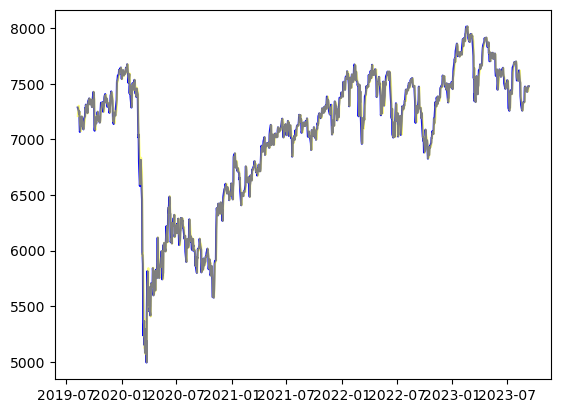

In [48]:
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(test.index, predictions, color='yellow', alpha = 0.5)
plt.show()